In [1]:
import ray
from ray import tune
from ray.rllib.agents.ppo import PPOTrainer
from ray.rllib.agents.ppo import APPOTrainer
import argparse
from ray.tune.registry import register_env
from pycigar.utils.registry import make_create_env
import yaml
import time
from pycigar.utils.input_parser import input_parser
from copy import deepcopy
SAVE_RATE = 2

"""
Parser to pass argument from terminal command
--run: RL algorithm, ex. PG, PPO, IMPALA
--stop: stop criteria of experiment. The experiment will stop when mean reward reach to this value.
Example of terminal command:
  > python single_relative_discrete_2_lr.py --run PPO --stop 0
"""
parser = argparse.ArgumentParser()
parser.add_argument("--run", type=str, default="PPO")  # try PG, PPO, IMPALA
parser.add_argument("--stop", type=int, default=0)

"""
Load the scenarios configuration file. This file contains the scenario information
for the experiment.
"""
sim_params = input_parser('ieee37busdata')

"""
Register the environment to OpenGymAI. This is necessary, RLlib can find the new environment
with string name env_name_v:version:, ex. SingleRelativeDiscreteCoopEnv_v0.
env_name: name of environment being used.
sim_params: simulation params, it is the scenario configuration.
simulator: the simulator being used, ex. opendss, gridlabd...
tracking_ids: list of ids of devices being tracked during the experiment.
"""

pycigar_params = {"exp_tag": "cooperative_multiagent_ppo",
                  "env_name": "CentralControlPVInverterEnv",
                  "simulator": "opendss",
                  "tracking_ids": ['inverter_s701a', 'creg1a', 'creg1c']}
"""
call function make_create_env() to register the new environment to OpenGymAI.
create_env() is a function to create new instance of the environment.
env_name: the registered name of the new environment.
"""
create_env, env_name = make_create_env(pycigar_params=pycigar_params, version=0)
register_env(env_name, create_env)
eval_start = 2500 #random.randint(0, 3599-750)
#eval_start = 13500 
eval_params = deepcopy(sim_params)
eval_params['scenario_config']['start_end_time'] = [eval_start, eval_start+750]

test_env = create_env(eval_params)
obs_space = test_env.observation_space  # get the observation space, we need this to construct our agent(s) observation input
act_space = test_env.action_space  # get the action space, we need this to construct our agent(s) action output

In [2]:
obs = test_env.reset()
reward = 0
done = False
while not done:
    # for each observation, let the policy decides what to do
    obs, r, done, _ = test_env.step(2)
    reward += r

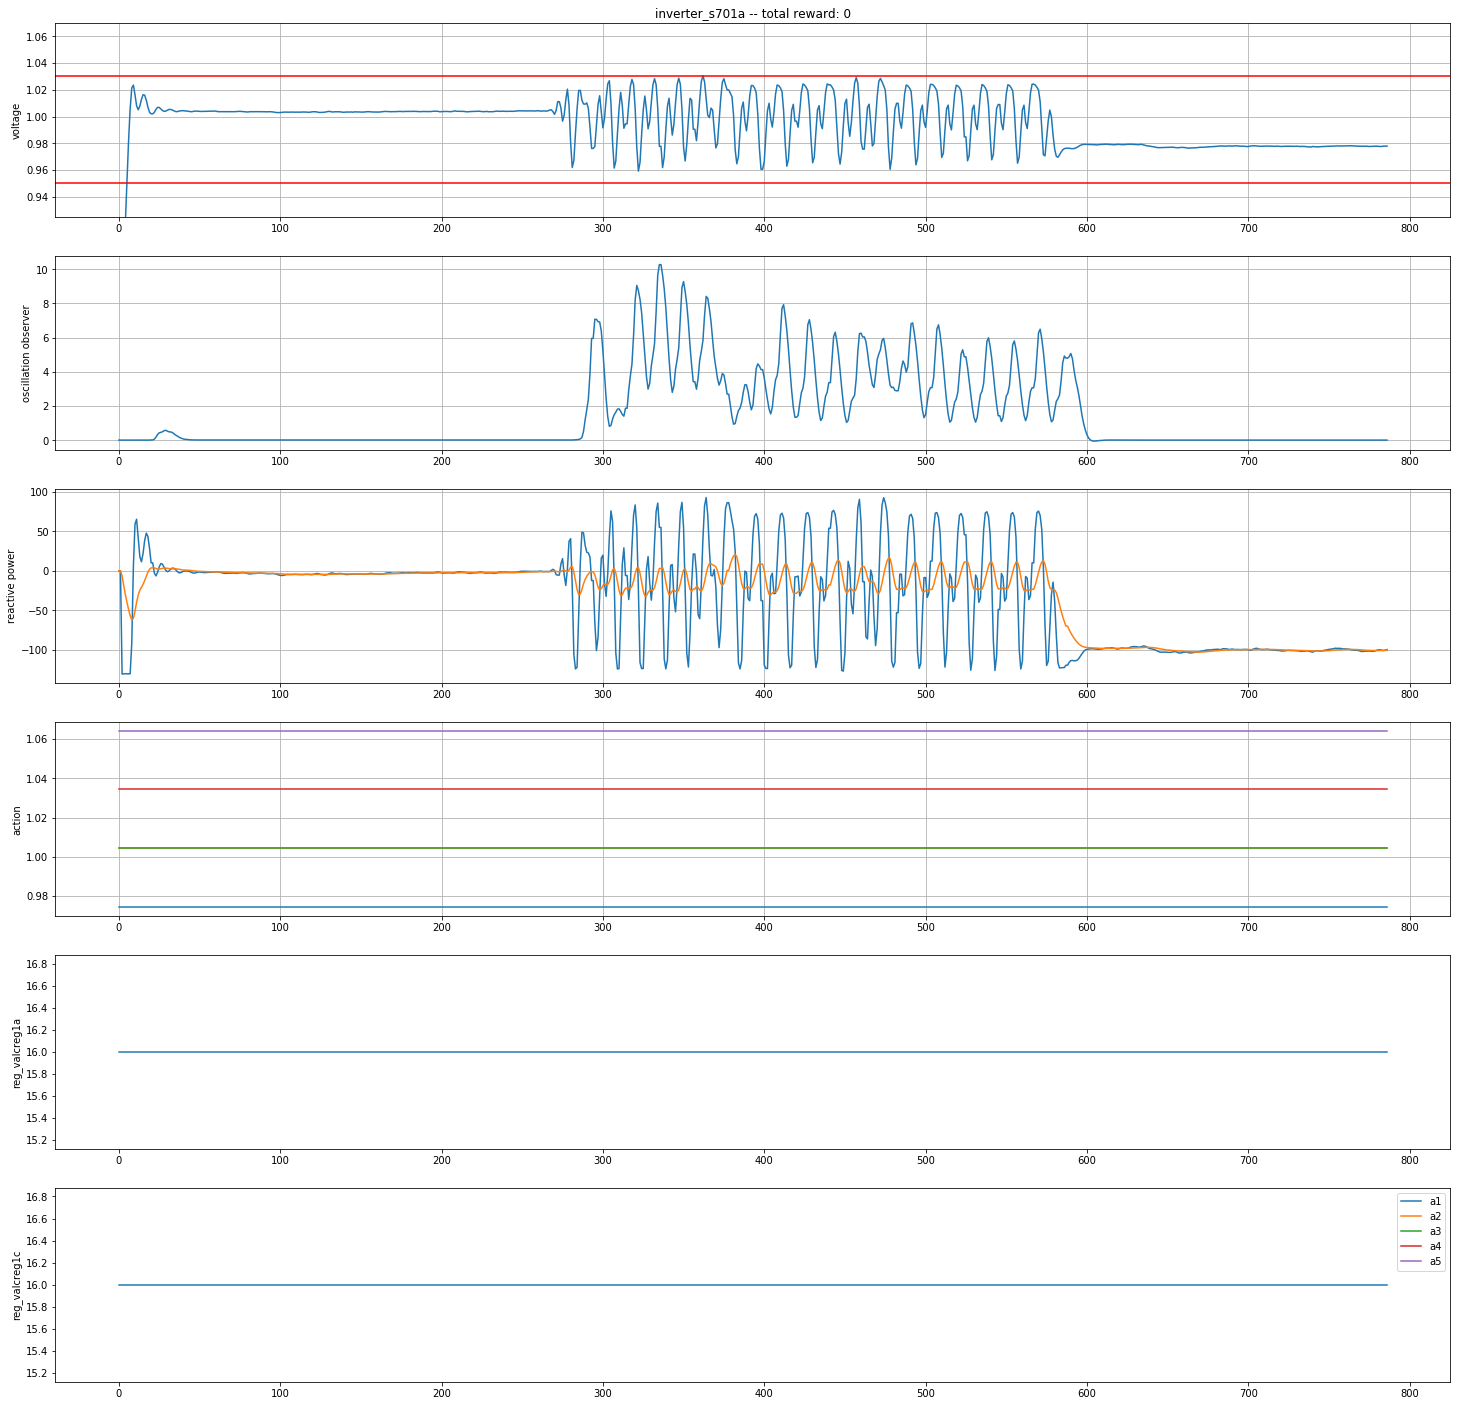

In [3]:
test_env.plot(pycigar_params['exp_tag'], env_name + 'testtttt', 0, 0)

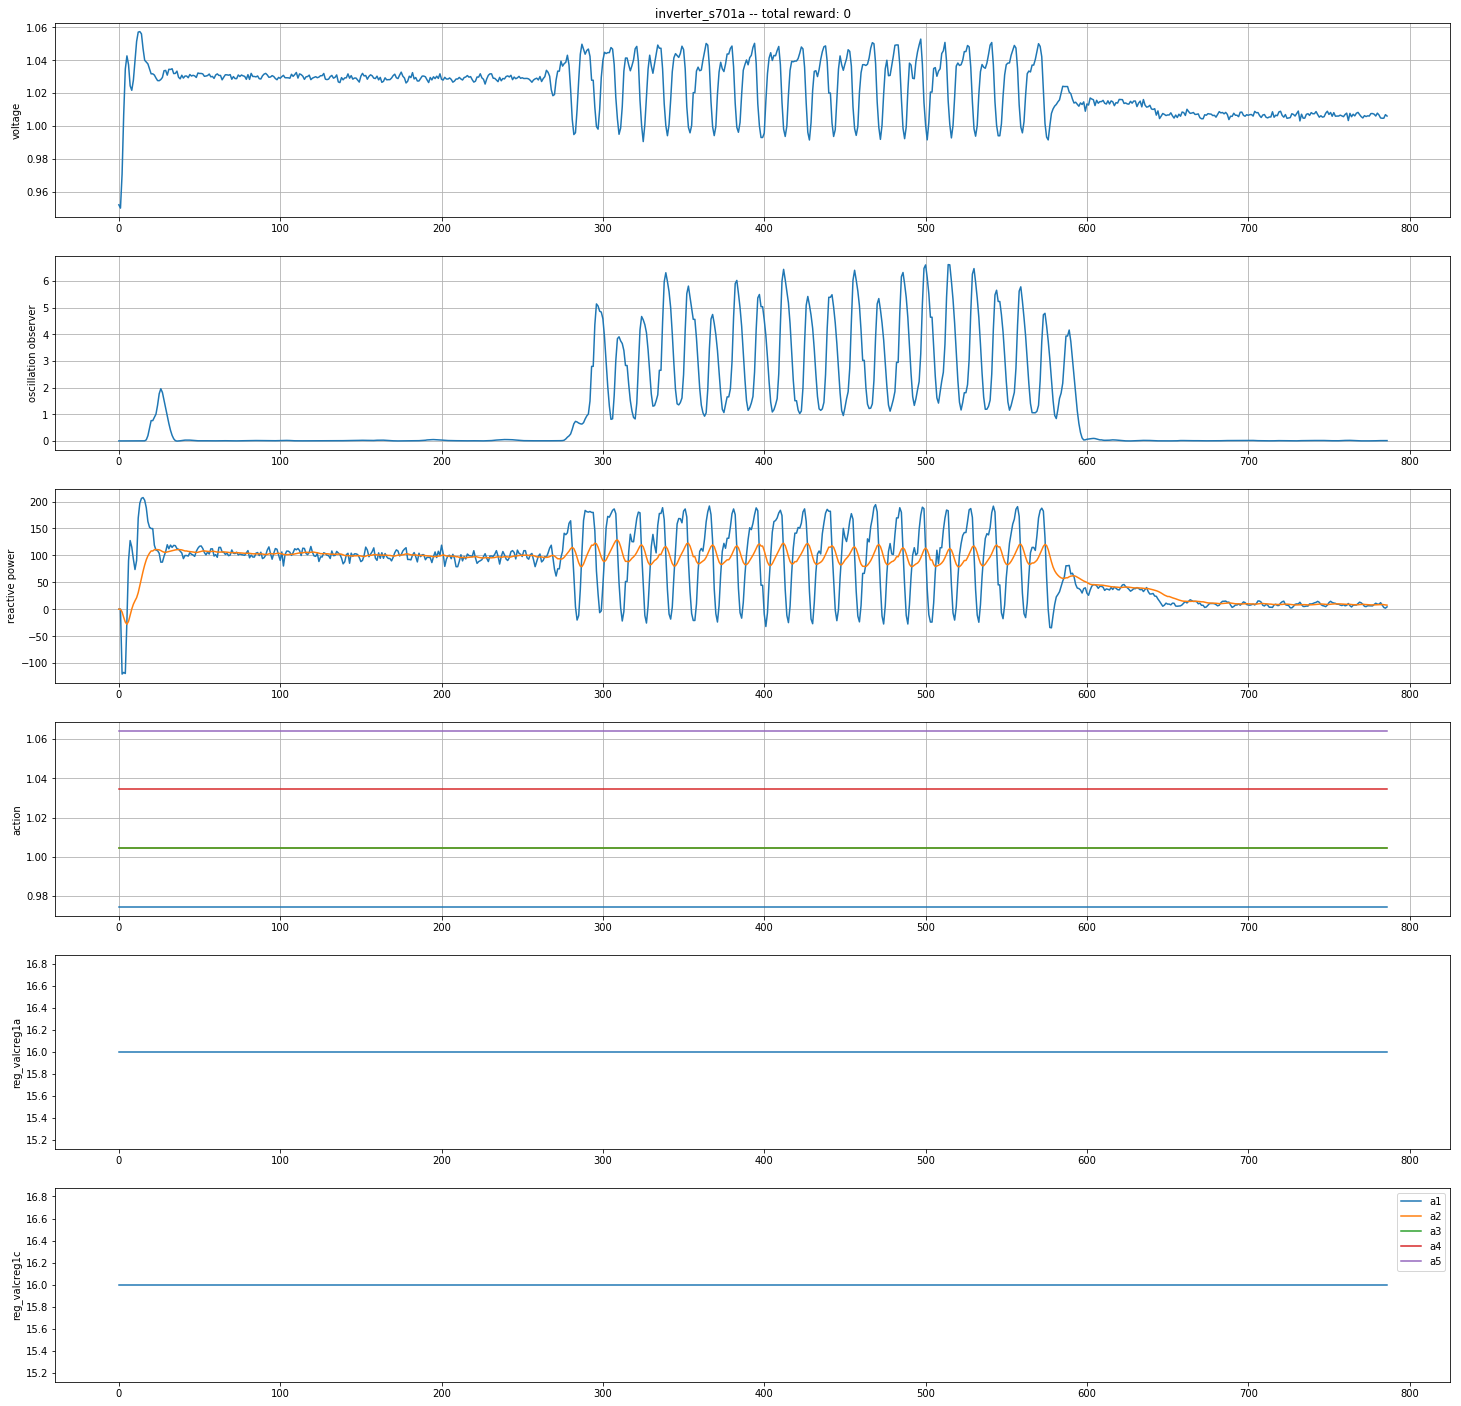

In [3]:
test_env.plot(pycigar_params['exp_tag'], env_name + 'testtttt', 0, 0)